In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [245]:
# Read in csv file
df = pd.read_csv("UC_dataset.csv")
print(df.head())


     Company Valuation ($B) Date Joined        Country           City  \
0  Bytedance           $140    4/7/2017          China        Beijing   
1     SpaceX           $125   12/1/2012  United States      Hawthorne   
2      SHEIN           $100    7/3/2018          China       Shenzhen   
3     Stripe            $95   1/23/2014  United States  San Francisco   
4     Klarna          $45.6  12/12/2011         Sweden      Stockholm   

                          Industry  \
0          Artificial intelligence   
1                            Other   
2  E-commerce & direct-to-consumer   
3                          Fintech   
4                          Fintech   

                                    Select Investors  
0  Sequoia Capital China, SIG Asia Investments, S...  
1  Founders Fund, Draper Fisher Jurvetson, Rothen...  
2  Tiger Global Management, Sequoia Capital China...  
3        Khosla Ventures, LowercaseCapital, capitalG  
4  Institutional Venture Partners, Sequoia Capita...  


In [246]:
# Check data types for the columns
print(df.info())
# Change the datatype of the currency and date joined column to float and datetime respectively
df["Valuation ($B)"] = df["Valuation ($B)"].str.strip("$")
df["Valuation ($B)"] = df["Valuation ($B)"].astype("float")
df["Date Joined"] = pd.to_datetime(df["Date Joined"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1157 non-null   object
 1   Valuation ($B)    1157 non-null   object
 2   Date Joined       1157 non-null   object
 3   Country           1157 non-null   object
 4   City              1140 non-null   object
 5   Industry          1157 non-null   object
 6   Select Investors  1156 non-null   object
dtypes: object(7)
memory usage: 63.4+ KB
None


In [247]:
# We have 17 missing values in the cities column and one in the investors column
print(df[df["City"].isnull()].head())
# the missing values seem to be for the cities and one for the investors since we do not need the city column in our current analysis we can drop it
df = df.drop(columns=["City"])


           Company  Valuation ($B) Date Joined    Country City  \
11             FTX            32.0  2021-07-20    Bahamas  NaN   
236      HyalRoute             3.5  2020-05-26  Singapore  NaN   
309    Amber Group             3.0  2021-06-21  Hong Kong  NaN   
340         Moglix             2.6  2021-05-17  Singapore  NaN   
367  Coda Payments             2.5  2022-04-15  Singapore  NaN   

                            Industry  \
11                           Fintech   
236      Mobile & telecommunications   
309                          Fintech   
340  E-commerce & direct-to-consumer   
367                          Fintech   

                                      Select Investors  
11              Sequoia Capital, Thoma Bravo, Softbank  
236                                          Kuang-Chi  
309  Tiger Global Management, Tiger Brokers, DCM Ve...  
340            Jungle Ventures, Accel, Venture Highway  
367               GIC. Apis Partners, Insight Partners  


In [248]:
# Count of unicorn companies per country
uc_by_country = (
    df.groupby(["Country"])["Company"]
    .count()
    .reset_index()
    .sort_values(by="Company", ascending=False)
)
# Sum of Valuation per country
va_by_country = (
    df.groupby(["Country"])["Valuation ($B)"]
    .sum()
    .reset_index()
    .sort_values(by="Valuation ($B)", ascending=False)
)
# Merge the two dataframes into one showing the count and valuation per country
country_merged = pd.merge(uc_by_country, va_by_country, on=["Country"]).sort_values(by="Valuation ($B)", ascending=False)
# Select top 10 countries to create bar chart
top10_countries = country_merged.head(10)
print(top10_countries)


           Country  Company  Valuation ($B)
0    United States      618         2035.46
1            China      174          676.56
2            India       67          196.97
3   United Kingdom       44          195.25
4          Germany       29           75.18
12          Sweden        8           62.52
5           France       24           56.02
11       Australia        8           54.40
7           Canada       19           49.23
6           Israel       22           46.72


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United States'),
  Text(0, 1, 'China'),
  Text(0, 2, 'India'),
  Text(0, 3, 'United Kingdom'),
  Text(0, 4, 'Germany'),
  Text(0, 5, 'Sweden'),
  Text(0, 6, 'France'),
  Text(0, 7, 'Australia'),
  Text(0, 8, 'Canada'),
  Text(0, 9, 'Israel')])

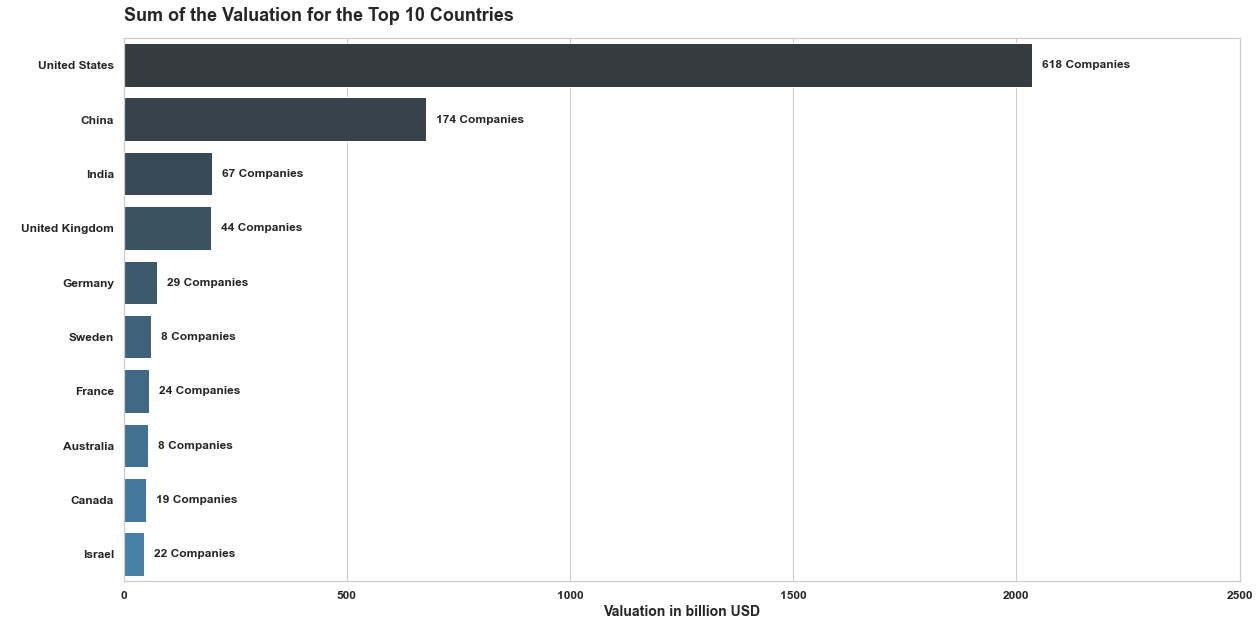

In [249]:
# Customize the shape and style of the bar chart
sns.set(rc={"figure.figsize":(20, 10)})
sns.set_theme(style="whitegrid")
sns.despine()
sns.set_color_codes("pastel")
palette = sns.color_palette("Blues_d", n_colors=20)
palette.reverse()
# Create bar plot
c_bar = sns.barplot(
    x="Valuation ($B)", y="Country", data=top10_countries, palette=palette
)
# Annotate bar plot with sum of valuations
plt.bar_label(
    c_bar.containers[0],
    labels=top10_countries["Company"].astype("str") + " Companies",
    padding=10,
    fontsize=12,
    fontweight="bold",
)
c_bar.set_title(
    "Sum of the Valuation for the Top 10 Countries",
    fontdict={"fontsize": 18, "fontweight": "bold"},
    loc="left",
    y=1.02,
)
c_bar.set_xlabel(
    "Valuation in billion USD",
    fontdict={"fontsize": 14, "fontweight": "bold"},
)
c_bar.set_xlim(0, 2500)
plt.xticks(fontsize=12, fontweight="bold")
c_bar.set_ylabel(" ")
plt.yticks(fontsize=12, fontweight="bold")


In [250]:
# Count of unicorn companies per Industry
uc_by_industry = (
    df.groupby(["Industry"])["Company"]
    .count()
    .reset_index()
    .sort_values(by="Company", ascending=False)
)
# Sum of Valuation per Industry
va_by_industry = (
    df.groupby(["Industry"])["Valuation ($B)"]
    .sum()
    .reset_index()
    .sort_values(by="Valuation ($B)", ascending=False)
)
# Merge the two dataframes into one showing the count and valuation per Industry
industry_merged = pd.merge(uc_by_industry, va_by_industry, on=["Industry"])
# Select top 10 Industries to create bar chart
top10_industry = industry_merged.head(10).sort_values(by="Valuation ($B)", ascending=False)
print(top10_industry)


                              Industry  Company  Valuation ($B)
0                              Fintech      244          932.07
1         Internet software & services      215          618.92
2      E-commerce & direct-to-consumer      116          433.01
4              Artificial intelligence       73          317.86
5                                Other       66          301.36
3                               Health       88          221.66
7  Supply chain, logistics, & delivery       58          176.37
6                        Cybersecurity       58          144.50
8          Data management & analytics       44          140.79
9          Mobile & telecommunications       39           86.45


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Fintech'),
  Text(0, 1, 'Internet software & services'),
  Text(0, 2, 'E-commerce & direct-to-consumer'),
  Text(0, 3, 'Artificial intelligence'),
  Text(0, 4, 'Other'),
  Text(0, 5, 'Health'),
  Text(0, 6, 'Supply chain, logistics, & delivery'),
  Text(0, 7, 'Cybersecurity'),
  Text(0, 8, 'Data management & analytics'),
  Text(0, 9, 'Mobile & telecommunications')])

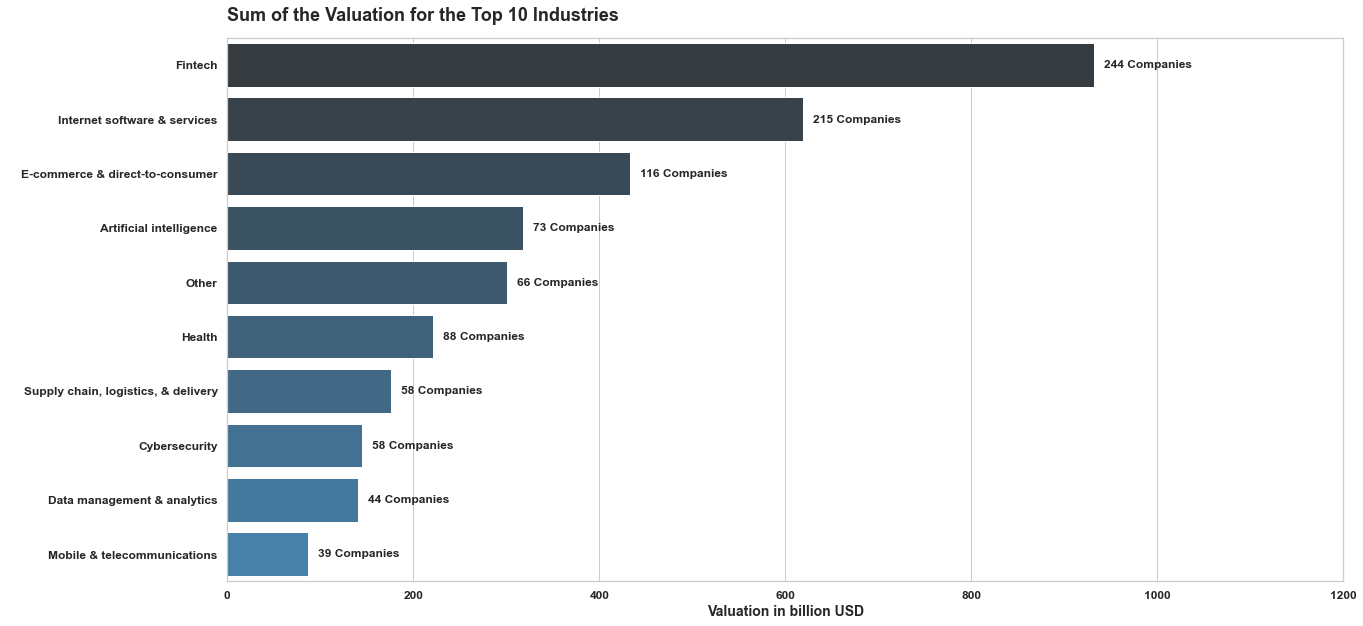

In [251]:
# Create bar plot
I_bar = sns.barplot(x="Valuation ($B)", y="Industry", data=top10_industry, palette=palette)
# Annotate bar plot with sum of valuations
plt.bar_label(
    I_bar.containers[0],
    labels=top10_industry["Company"].astype("str") + " Companies",
    padding=10,
    fontsize=12,
    fontweight="bold",
)
I_bar.set_title(
    "Sum of the Valuation for the Top 10 Industries",
    fontdict={"fontsize": 18, "fontweight": "bold"},
    loc="left",
    y=1.02,
)
I_bar.set_xlabel(
    "Valuation in billion USD",
    fontdict={"fontsize": 14, "fontweight": "bold"},
)
plt.xticks(fontsize=12, fontweight="bold")
I_bar.set_xlim(0, 1200)
I_bar.set_ylabel(" ")
plt.yticks(fontsize = 12, fontweight="bold")


In [252]:
# Split the investors column into different rows
df1= df.assign(split_investors=df["Select Investors"].str.split(","))
df2= df1.explode("split_investors")
# Count of unicorn companies per Investor
uc_by_investor = (
    df2.groupby(["split_investors"])["Company"]
    .count()
    .reset_index()
    .sort_values(by="Company", ascending=False)
)
# Sum of Valuation per Investor
va_by_investor = (
    df2.groupby(["split_investors"])["Valuation ($B)"]
    .sum()
    .reset_index()
    .sort_values(by="Valuation ($B)", ascending=False)
)
# Merge the two dataframes into one showing the count and valuation per Investor
investor_merged = pd.merge(uc_by_investor, va_by_investor, on=["split_investors"]).sort_values(by="Valuation ($B)", ascending=False)
# Select top 10 Industries to create bar chart
top20_investors = investor_merged.head(20).sort_values(by="Valuation ($B)", ascending=False)
print(top20_investors)

                        split_investors  Company  Valuation ($B)
4                 Sequoia Capital China       31          273.42
23              Tiger Global Management       15          194.16
1                       Sequoia Capital       33          173.35
57                       Softbank Group        8          170.80
36                      Khosla Ventures       12          166.14
15                Sequoia Capital China       18          165.89
2                   Andreessen Horowitz       32          144.97
184                SIG Asia Investments        3          144.31
380                          Sina Weibo        2          143.00
96                        Founders Fund        5          132.95
1496            Draper Fisher Jurvetson        1          125.00
1522                Rothenberg Ventures        1          125.00
82                             capitalG        6          119.40
6                                 Accel       29          112.33
161            Shunwei Ca

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Sequoia Capital China'),
  Text(0, 1, 'Tiger Global Management'),
  Text(0, 2, ' Sequoia Capital'),
  Text(0, 3, ' Softbank Group'),
  Text(0, 4, 'Khosla Ventures'),
  Text(0, 5, ' Sequoia Capital China'),
  Text(0, 6, 'Andreessen Horowitz'),
  Text(0, 7, ' SIG Asia Investments'),
  Text(0, 8, ' Sina Weibo'),
  Text(0, 9, 'Founders Fund'),
  Text(0, 10, ' Draper Fisher Jurvetson'),
  Text(0, 11, ' Rothenberg Ventures'),
  Text(0, 12, ' capitalG'),
  Text(0, 13, 'Accel'),
  Text(0, 14, ' Shunwei Capital Partners'),
  Text(0, 15, ' Insight Partners'),
  Text(0, 16, ' DST Global'),
  Text(0, 17, ' Accel'),
  Text(0, 18, ' Kleiner Perkins Caufield & Byers'),
  Text(0, 19, ' LowercaseCapital')])

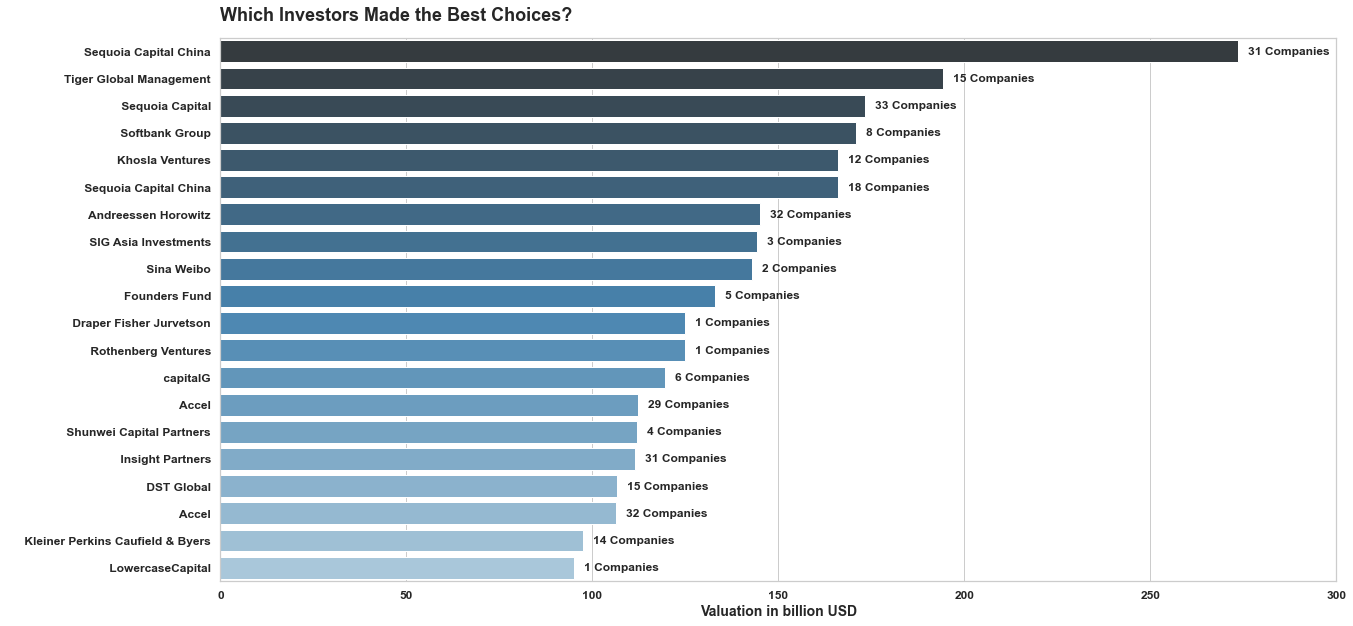

In [253]:
# Create bar plot
In_bar = sns.barplot(x="Valuation ($B)", y="split_investors", data=top20_investors, palette=palette)
# Annotate bar plot with sum of valuations
plt.bar_label(
    In_bar.containers[0],
    labels=top20_investors["Company"].astype("str") + " Companies",
    padding=10,
    fontsize=12,
    fontweight="bold",
)
In_bar.set_title(
    "Which Investors Made the Best Decisions? ",
    fontdict={"fontsize": 18, "fontweight": "bold"},
    loc="left",
    y=1.02,
)
In_bar.set_xlabel(
    "Valuation in billion USD",
    fontdict={"fontsize": 14, "fontweight": "bold"},
)
plt.xticks(fontsize=12, fontweight="bold")
In_bar.set_xlim(0, 300)
In_bar.set_ylabel(" ")
plt.yticks(fontsize = 12, fontweight="bold")